# **06. Basic Computer Vision**

**Topic**: Using CNN in computer vision, and visualize the feature maps

In [1]:
from keras import layers
from keras import models
from keras import optimizers
from keras.datasets import mnist
from keras.utils import to_categorical

Using TensorFlow backend.


## **初嘗 CNN**

### **Build a basic CNN**

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                36928     
__________

### **Load Data (MNIST)**

In [11]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [12]:
print("Train images : ",train_images.shape)
print("Train labels : ",train_labels.shape)
print("Test images : ",test_images.shape)
print("Test labels : ",test_labels.shape)

Train images :  (60000, 28, 28, 1)
Train labels :  (60000, 10)
Test images :  (10000, 28, 28, 1)
Test labels :  (10000, 10)


In [13]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 11s 187us/step - loss: 0.1612 - acc: 0.9488
Epoch 2/5
60000/60000 [==============================] - 11s 185us/step - loss: 0.0450 - acc: 0.9859
Epoch 3/5
60000/60000 [==============================] - 11s 184us/step - loss: 0.0313 - acc: 0.9903
Epoch 4/5
60000/60000 [==============================] - 11s 178us/step - loss: 0.0244 - acc: 0.9929
Epoch 5/5
60000/60000 [==============================] - 11s 186us/step - loss: 0.0191 - acc: 0.9942


In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

10000/10000 [==============================] - 1s 112us/step


0.9923

**Difference between Convolutional Layer and Fully connected Layer**
* Fully connected Layer 是學習全域的特徵，每個小pixel都是參考點
* Convolutional Layer 則是學習局部的特徵，將一個小區域作為特徵點

**Advantages of Convolutional Layer**
* Translation invariant: 例如今天我們可以把右下角學習到的特徵，應用在圖片左上角上面，這符合我們現實生活特徵可以平移的特點
* Spatial hierarchies of patterns: CNN 通常將原本又寬又薄的 input，變得又小又深，就像是我們看東西會從輪廓看到細節，具有層次的結構

## **以少量資料來訓練 CNN**

有 3 種方法可以幫忙處理
* data augmentation (資料擴充法)
* feature extration with a pretrained network (使用 pretrained model 來幫助 feature extration)
* fine-tuning a pretrained model (使用預先訓練的 model)

### Prepaer Dataset

這邊使用 kaggle 的 dataset, 辨別 貓 和 狗 的圖片,</br>
網址: https://www.kaggle.com/c/dogs-vs-cats/data</br>
我們先把它切成小的 dataset

In [17]:
import os, shutil

original_dataset_dir = 'C:\\Users\\azaz4\\Desktop\\PostgreSQL\\data\\train' # 原本檔案的路徑
base_dir = 'C:\\Users\\azaz4\\Desktop\\PostgreSQL\\data\\small_dataset' # 想解壓縮檔案的路徑

#----------------------------------------------------------------------------
# 如果 base dir 不存在, 那麼建立資料夾
#----------------------------------------------------------------------------
if not os.path.exists(base_dir): os.mkdir(base_dir)

#----------------------------------------------------------------------------
# 將 data 分散成 train, test 及 validation 的資料夾
#----------------------------------------------------------------------------
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir): os.mkdir(train_dir)
    
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir): os.mkdir(test_dir)
    
val_dir = os.path.join(base_dir, 'val')
if not os.path.exists(val_dir): os.mkdir(val_dir)
    
#----------------------------------------------------------------------------
# 在 train, test 及 validation 下個創立 cat 及 dog 資料夾
#----------------------------------------------------------------------------
train_cat_dir = os.path.join(train_dir, 'cats')
if not os.path.exists(train_cat_dir): os.mkdir(train_cat_dir)
    
train_dog_dir = os.path.join(train_dir, 'dogs')
if not os.path.exists(train_dog_dir): os.mkdir(train_dog_dir)
    
test_cat_dir = os.path.join(test_dir, 'cats')
if not os.path.exists(test_cat_dir): os.mkdir(test_cat_dir)
    
test_dog_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dog_dir): os.mkdir(test_dog_dir)
    
val_cat_dir = os.path.join(val_dir, 'cats')
if not os.path.exists(val_cat_dir): os.mkdir(val_cat_dir)
    
val_dog_dir = os.path.join(val_dir, 'dogs')
if not os.path.exists(val_dog_dir): os.mkdir(val_dog_dir)

#----------------------------------------------------------------------------
# 把 img 分別依 train, test, val 複製到 cat 及 dog 的資料夾中
#----------------------------------------------------------------------------
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)] #-----cat---train:1000
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cat_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]#---cat--test:500
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cat_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]#---cat---val:500
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(val_cat_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)] #-----dog---train:1000
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dog_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]#---dog--test:500
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dog_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]#---dog---val:500
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(val_dog_dir, fname)
    shutil.copyfile(src, dst)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\azaz4\\Desktop\\PostgreSQL\\data\\train\\cat.0.jpg'

In [18]:
print('Train dog dataset : {}'.format(len(os.listdir(train_dog_dir))))
print('Train cat dataset : {}'.format(len(os.listdir(train_cat_dir))))
print('Test dog dataset : {}'.format(len(os.listdir(test_dog_dir))))
print('Test cat dataset : {}'.format(len(os.listdir(test_cat_dir))))
print('Val dog dataset : {}'.format(len(os.listdir(val_dog_dir))))
print('Val cat dataset : {}'.format(len(os.listdir(val_cat_dir))))

Train dog dataset : 1000
Train cat dataset : 1000
Test dog dataset : 500
Test cat dataset : 500
Val dog dataset : 500
Val cat dataset : 500


### Build Neuro Net Work

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [21]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

### Data preprocessing by keras

使用 keras 的 ImageDataGenerator 可以幫助我們做一些前處理, 並自動將影像檔轉換成批次的 tensor, 好放到我們的 model 中

In [22]:
from keras.preprocessing.image import ImageDataGenerator

#-------------------
# Rescale the Image
#-------------------
train_data_gen = ImageDataGenerator(rescale=1/255)
test_data_gen = ImageDataGenerator(rescale=1/255)

#------------------------------------
# Build the training data generator
#------------------------------------
train_generator = train_data_gen.flow_from_directory(
    train_dir,
    target_size=(150, 150),                              
    batch_size=20,
    class_mode='binary')

#-------------------------------------
# Build the validation data generator
#-------------------------------------
validation_generator = test_data_gen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [23]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [24]:
# Using Image generator to fit the model
history = model.fit_generator(
    train_generator, 
    steps_per_epoch=100,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50)

model.save('model/cats_dogs_classificator_small_data.h5')

Epoch 1/20
100/100 [==============================] - 13s 126ms/step - loss: 0.6915 - acc: 0.5395 - val_loss: 0.6788 - val_acc: 0.5460
Epoch 2/20
100/100 [==============================] - 11s 112ms/step - loss: 0.6579 - acc: 0.5920 - val_loss: 0.6572 - val_acc: 0.6040
Epoch 3/20
100/100 [==============================] - 11s 113ms/step - loss: 0.6114 - acc: 0.6660 - val_loss: 0.6230 - val_acc: 0.6660
Epoch 4/20
100/100 [==============================] - 12s 118ms/step - loss: 0.5671 - acc: 0.7100 - val_loss: 0.5882 - val_acc: 0.6910
Epoch 5/20
100/100 [==============================] - 11s 114ms/step - loss: 0.5269 - acc: 0.7395 - val_loss: 0.5875 - val_acc: 0.6920
Epoch 6/20
100/100 [==============================] - 12s 120ms/step - loss: 0.5051 - acc: 0.7370 - val_loss: 0.5659 - val_acc: 0.7070
Epoch 7/20
100/100 [==============================] - 12s 120ms/step - loss: 0.4698 - acc: 0.7735 - val_loss: 0.5522 - val_acc: 0.7250
Epoch 8/20
100/100 [==============================] - 1

顯示 train 和 validation 週期的 loss 及 acc 的準確性

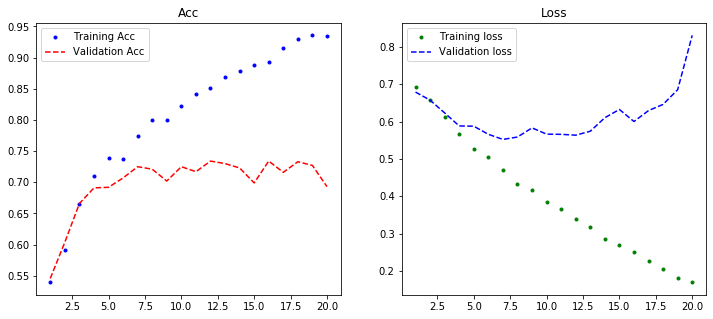

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title("Acc")
plt.plot(epochs, acc, 'b.', label='Training Acc')
plt.plot(epochs, val_acc, 'r--', label='Validation Acc')
plt.legend()

plt.subplot(1,2,2)
plt.title("Loss")
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b--', label='Validation loss')
plt.legend()

plt.show()

### Data Augmentation

In [26]:
datagen = ImageDataGenerator(rotation_range=40,        # 影像旋轉角度
                             width_shift_range=0.2,    # 水平平移
                             height_shift_range=0.2,   # 垂直平移
                             shear_range=0.2,          # 傾斜平移  
                             zoom_range=0.2,           # 隨機縮放大小
                             horizontal_flip=True,     # 隨機水平翻轉影像
                             fill_mode='nearest')      # 扭曲的影像要用甚麼方式填補, 有 nearest、reflect、wrap、constant 等四種方式

Choosed Image : C:\Users\azaz4\Desktop\PostgreSQL\data\small_dataset\train\cats\cat.100.jpg

Original size:	(150, 150, 3)
Reshape size:	(1, 150, 150, 3)


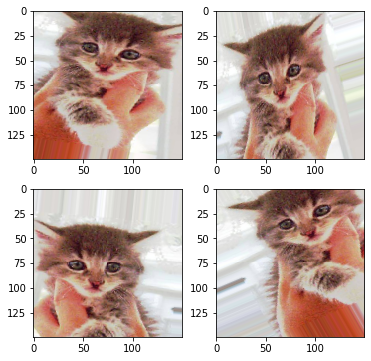

In [27]:
from keras.preprocessing import image

fnames = [ os.path.join(train_cat_dir, fname) for fname in os.listdir(train_cat_dir) ]

img_path = fnames[3]
print(f"Choosed Image : {img_path}\n")

img = image.load_img( img_path, target_size=(150, 150) )
x = image.img_to_array(img)
print(f"Original size:\t{x.shape}")
x = x.reshape( (1,)+x.shape )
print(f"Reshape size:\t{x.shape}")
      
i = 0
plt.figure(figsize=(6,6))
for batch in datagen.flow(x, batch_size=1):
    plt.subplot(2,2,i+1)
    imgplot = plt.imshow( image.array_to_img(batch[0]) )
    i+=1
    
    if i%4==0: break
plt.show()

### Using Data Augmentation in Model

In [29]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [33]:
train_data_gen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_data_gen = ImageDataGenerator(rescale=1/255)

train_generator = train_data_gen.flow_from_directory(train_dir, 
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')

validation_generator = test_data_gen.flow_from_directory(val_dir,
                                                         target_size=(150, 150),
                                                         batch_size=32,
                                                         class_mode='binary')

history = model.fit_generator(train_generator, 
                              steps_per_epoch=100,
                              epochs=20,
                              validation_data=validation_generator,
                              validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/20
100/100 [==============================] - 43s 427ms/step - loss: 0.6942 - acc: 0.5072 - val_loss: 0.6856 - val_acc: 0.5755
Epoch 2/20
100/100 [==============================] - 39s 388ms/step - loss: 0.6823 - acc: 0.5534 - val_loss: 0.6812 - val_acc: 0.5528
Epoch 3/20
100/100 [==============================] - 39s 391ms/step - loss: 0.6739 - acc: 0.5750 - val_loss: 0.6631 - val_acc: 0.6003
Epoch 4/20
100/100 [==============================] - 45s 446ms/step - loss: 0.6632 - acc: 0.5969 - val_loss: 0.7137 - val_acc: 0.5477
Epoch 5/20
100/100 [==============================] - 47s 467ms/step - loss: 0.6488 - acc: 0.6191 - val_loss: 0.6475 - val_acc: 0.6440
Epoch 6/20
100/100 [==============================] - 47s 474ms/step - loss: 0.6393 - acc: 0.6238 - val_loss: 0.6265 - val_acc: 0.6495
Epoch 7/20
100/100 [==============================] - 48s 480ms/step - loss: 0.6157 - acc: 0.6581 - val_lo

In [34]:
model.save('model/cats_dogs_classificator_small_data_Augmentation.h5')

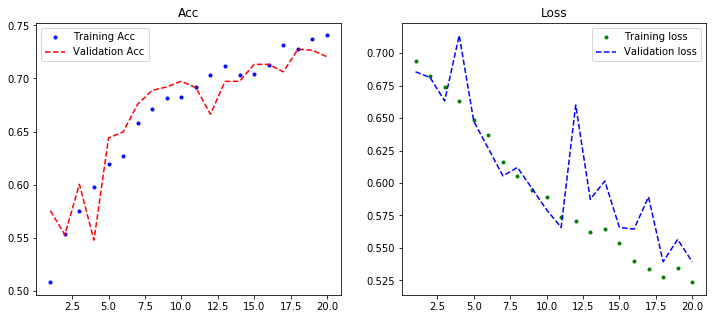

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title("Acc")
plt.plot(epochs, acc, 'b.', label='Training Acc')
plt.plot(epochs, val_acc, 'r--', label='Validation Acc')
plt.legend()

plt.subplot(1,2,2)
plt.title("Loss")
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b--', label='Validation loss')
plt.legend()

plt.show()

## **使用 Pretrained model**